In [50]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import to_categorical
import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [2]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "D:/task4/leapGestRecog/leapGestRecog"

In [3]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [51]:
# shuffle the input data
import random
random.shuffle(image_data)

In [52]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [53]:
label[:10]

[9, 0, 6, 9, 6, 1, 0, 8, 8, 4]

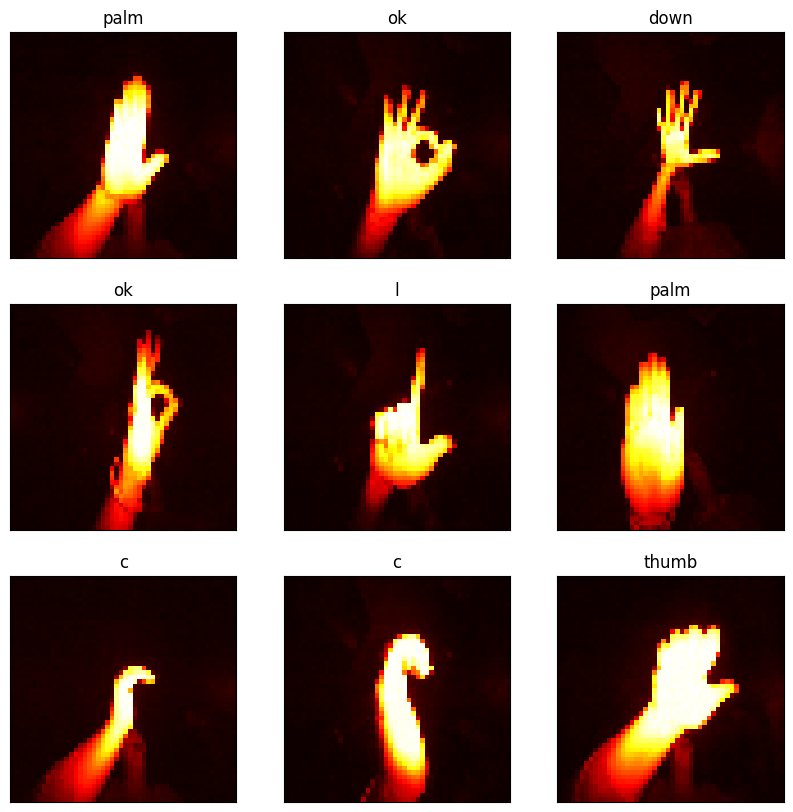

In [54]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [55]:
# Normalize the data
input_data = np.array(input_data).astype('float32') / 255.0  # Normalize and convert to float32
input_data = np.expand_dims(input_data, axis=-1)  # Reshape to (num_samples, 50, 50, 1)

# Convert labels to a NumPy array (if not already done)
label = np.array(label)

In [56]:

# one hot encoding
from tensorflow.keras.utils import to_categorical

# One-hot encoding without specifying dtype
label = to_categorical(label, num_classes=10)


In [57]:

# Verify shapes after encoding
print("Labels shape after one-hot encoding:")
print("y_train shape:", label.shape)  # Expected: (num_samples_train, 10)

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size=0.3, random_state=0)

Labels shape after one-hot encoding:
y_train shape: (20000, 10)


In [58]:
# Verify shapes
print("X_train shape:", X_train.shape)  # Expected: (num_samples_train, 50, 50, 1)
print("y_train shape:", y_train.shape)  # Expected: (num_samples_train, 10)
print("X_test shape:", X_test.shape)    # Expected: (num_samples_test, 50, 50, 1)
print("y_test shape:", y_test.shape)    # Expected: (num_samples_test, 10)


X_train shape: (14000, 50, 50, 1)
y_train shape: (14000, 10)
X_test shape: (6000, 50, 50, 1)
y_test shape: (6000, 10)


In [60]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 21, 21, 64)       

In [61]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 102s 229ms/step - loss: 0.3191 - accuracy: 0.8958 - val_loss: 0.0100 - val_accuracy: 0.9978
Epoch 2/7
438/438 [==============================] - 101s 230ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0058 - val_accuracy: 0.9977
Epoch 3/7
438/438 [==============================] - 104s 237ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0016 - val_accuracy: 0.9993
Epoch 4/7
438/438 [==============================] - 105s 239ms/step - loss: 0.0075 - accuracy: 0.9983 - val_loss: 7.0371e-04 - val_accuracy: 0.9997
Epoch 5/7
438/438 [==============================] - 105s 241ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 3.5593e-04 - val_accuracy: 0.9998
Epoch 6/7
438/438 [==============================] - 102s 233ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 3.2111e-04 - val_accuracy: 1.0000
Epoch 7/7
438/438 [==============================] - 100s 229ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0

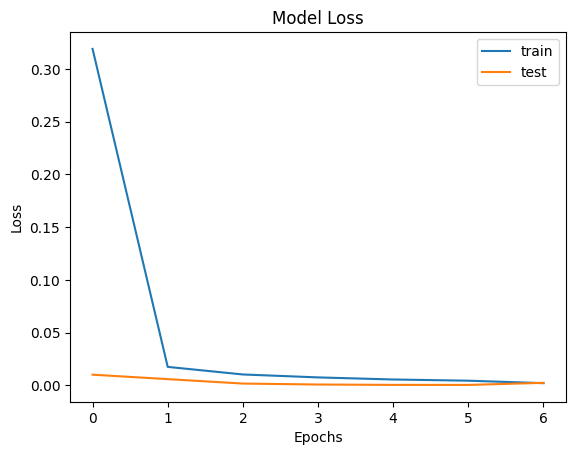

In [62]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

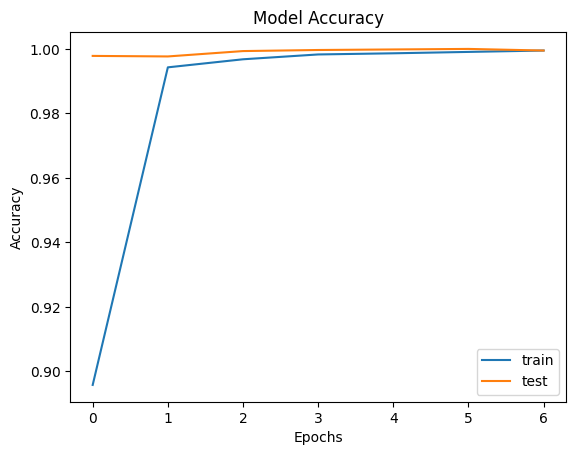

In [63]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [64]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 7s 36ms/step - loss: 0.0023 - accuracy: 0.9995
Test accuracy: 99.95%


[]

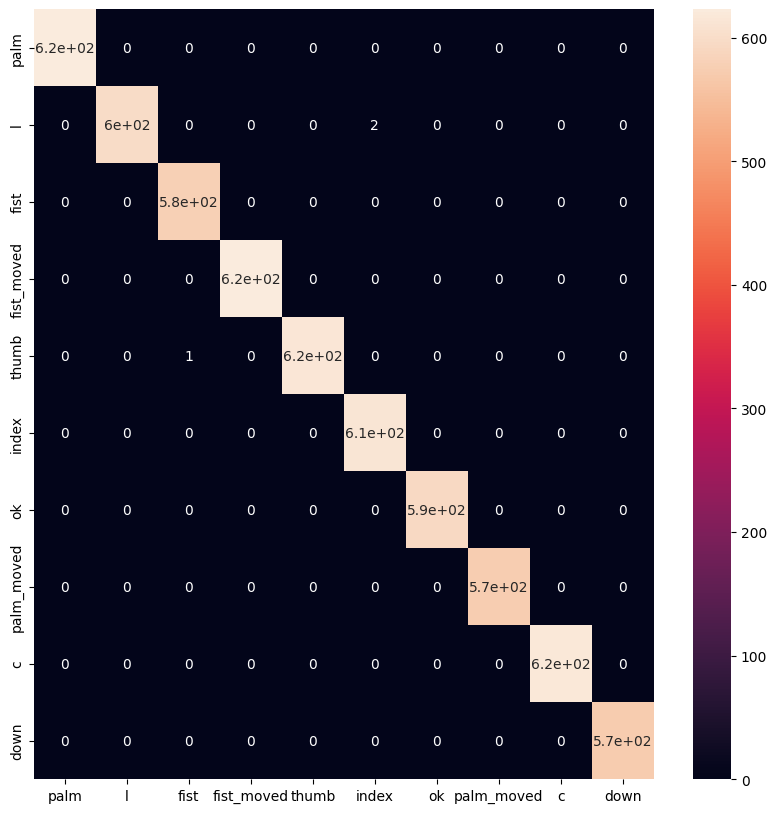

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()